# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosen the airbnbListingsData.csv data set.
2. I will be predicting/the label is the number of bedrooms an Airbnb has based on several factors, as I believe we have not done that in an assignment yet.
3. This is a supervised learning problem since we have a label and the model learns relationships between the features and the label to make predictions on new, unseen data. Since we're predicting the exact number of bedrooms instead of them being discrete categories, this is a regression problem. Thus, this is neither binary classification nor multi-class classification.
4. My features, before any changes, are as follows: 'name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       and 'n_host_verifications'.
5. This problem is important because the search recommendation systems, user experience, and pricing strategies on Airbnb can be enhanced through a model that can accurately predict the number of bedrooms an Airbnb has. Overall, an increase in efficiency has the potential to increase revenue for Airbnb as a company.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means ✔
    * finding and replacing outliers ✔
    * renaming features and labels ✔
    * finding and replacing outliers ✔
    * performing feature engineering techniques such as one-hot encoding on categorical features ✔
    * selecting appropriate features and removing irrelevant features ✔
    * performing specific data cleaning and preprocessing techniques for an NLP problem [N/A]
    * addressing class imbalance in your data sample to promote fair AI [N/A]
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?

    - Many models, specifically ones that are suited for regression problems such as this, and compare them to see the best one.
      
4. Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?

    - I do not believe I need to scale my data. I tried to remove too many features and it caused me more harm than good. The amount of data I ahve currently seems to work like a charm!
 
6. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?

      - I would like to use GridSearchCV to find the best hyperpawrameters for the most suited ML model.
    
Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

## -> Data Analysis

In [3]:
# Obtain the shape.
df.shape

(28022, 50)

In [4]:
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
count,16179.000000,16909.000000,28022.000000,28022.000000,28022.000000,28022.000000,25104.000000,26668.000000,28022.000000,28022.000000,...,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000,28022.000000
mean,0.906901,0.791953,14.554778,14.554778,2.874491,1.142174,1.329708,1.629556,154.228749,18.689387,...,4.814300,4.808041,4.750393,4.647670,9.581900,5.562986,3.902077,0.048283,1.758325,5.169510
std,0.227282,0.276732,120.721287,120.721287,1.860251,0.421132,0.700726,1.097104,140.816605,25.569151,...,0.438603,0.464585,0.415717,0.518023,32.227523,26.121426,17.972386,0.442459,4.446143,2.028497
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,29.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,0.940000,0.680000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,2.000000,...,4.810000,4.810000,4.670000,4.550000,1.000000,0.000000,0.000000,0.000000,0.130000,4.000000
50%,1.000000,0.910000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,115.000000,30.000000,...,4.960000,4.970000,4.880000,4.780000,1.000000,1.000000,0.000000,0.000000,0.510000,5.000000
75%,1.000000,1.000000,3.000000,3.000000,4.000000,1.000000,1.000000,2.000000,180.000000,30.000000,...,5.000000,5.000000,5.000000,5.000000,3.000000,1.000000,1.000000,0.000000,1.830000,7.000000
max,1.000000,1.000000,3387.000000,3387.000000,16.000000,8.000000,12.000000,21.000000,1000.000000,1250.000000,...,5.000000,5.000000,5.000000,5.000000,421.000000,308.000000,359.000000,8.000000,141.000000,13.000000


In [5]:
df.dtypes

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

In [6]:
# Display everything except 'bedrooms', our label.
df.columns[df.columns!='bedrooms']

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bo

## -> Data Preparation

In [7]:
import scipy.stats as stats 
df['label_bedrooms'] = stats.mstats.winsorize(df['bedrooms'], limits = [0.01,0.01])

In [8]:
# Checks for missing values.
missing_values = df.isnull().sum()
nan_detected = missing_values > 0
print(nan_detected)

name                                             True
description                                      True
neighborhood_overview                            True
host_name                                       False
host_location                                    True
host_about                                       True
host_response_rate                               True
host_acceptance_rate                             True
host_is_superhost                               False
host_listings_count                             False
host_total_listings_count                       False
host_has_profile_pic                            False
host_identity_verified                          False
neighbourhood_group_cleansed                    False
room_type                                       False
accommodates                                    False
bathrooms                                       False
bedrooms                                         True
beds                        

In [9]:
# I chose to apply the lambda function to each element in df.dtypes.
is_int_or_float = df.dtypes.apply(lambda x: x in ['int64', 'float64'])
# Prints the boolean value for each column.
is_int_or_float

name                                            False
description                                     False
neighborhood_overview                           False
host_name                                       False
host_location                                   False
host_about                                      False
host_response_rate                               True
host_acceptance_rate                             True
host_is_superhost                               False
host_listings_count                              True
host_total_listings_count                        True
host_has_profile_pic                            False
host_identity_verified                          False
neighbourhood_group_cleansed                    False
room_type                                       False
accommodates                                     True
bathrooms                                        True
bedrooms                                         True
beds                        

In [10]:
# I simply used the '&' operator to combine the two binary series.
to_impute = nan_detected & is_int_or_float
df.columns[to_impute]

Index(['host_response_rate', 'host_acceptance_rate', 'bedrooms', 'beds',
       'label_bedrooms'],
      dtype='object')

In [11]:
to_impute_selected = ['host_response_rate', 'host_acceptance_rate',
       'bedrooms', 'beds','label_bedrooms']

# Iterates through the columns in to_impute_selected.
for i in to_impute_selected:
    # Creates a new column called <original-column-name>_na.
    new_colname = i + '_na'
    df[new_colname] = df[i].isna()

In [12]:
# Iterates through the columns in to_impute_selected.
for column in to_impute_selected:
    # Takes the mean value of all of the columns.
    mean_value = df[column].mean()
    # Puts the mean value in place of the missing values.
    df[column].fillna(mean_value, inplace=True)

In [13]:
for colname in to_impute_selected:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))

host_response_rate missing values count :0
host_acceptance_rate missing values count :0
bedrooms missing values count :0
beds missing values count :0
label_bedrooms missing values count :0


In [14]:
object_columns = df.select_dtypes(include=['object']).columns
unique_values = df[object_columns].nunique()
unique_values

name                            27386
description                     25952
neighborhood_overview           15800
host_name                        7566
host_location                    1364
host_about                      11962
neighbourhood_group_cleansed        5
room_type                           4
amenities                       25020
dtype: int64

In [15]:
# These are the features that I believe should be transformed using one-hot encoding, since they have the lowest number of unique values.
columns_to_inspect = ['neighbourhood_group_cleansed','room_type']

# Prints the unique values for each feature I selected.
for column in columns_to_inspect:
    unique_values = df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")

Unique values for 'neighbourhood_group_cleansed': ['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']
Unique values for 'room_type': ['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']


In [16]:
# Remove irrelevant categorical features...
irrelevant_categorical_features = ['name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 'host_about', 'amenities']
df = df.drop(columns=irrelevant_categorical_features)

# Remove irrelevant numerical features...
irrelevant_numerical_features = ['host_is_superhost', 'host_has_profile_pic', 'host_identity_verified', 'bedrooms_na','bedrooms','label_bedrooms_na']
df = df.drop(columns=irrelevant_numerical_features)

# Convert int64 columns to float64.
int_columns = df.select_dtypes(include=['int64']).columns
df[int_columns] = df[int_columns].astype(float)

# Convert object columns to float64.
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].apply(pd.to_numeric, errors='coerce')

In [17]:
# One-hot encode the feature I identified, 'neighbourhood_group_cleansed'.
neighbourhood_group_cleansed_encoded = pd.get_dummies(df['neighbourhood_group_cleansed'], prefix='neighbourhood_group_cleansed')
# Drop the original 'neighbourhood_group_cleansed' column.
df.drop('neighbourhood_group_cleansed', axis=1, inplace=True)
df = pd.concat([df, neighbourhood_group_cleansed_encoded], axis=1)

# One-hot encode the feature I identified, 'room_type'.
room_type_encoded = pd.get_dummies(df['room_type'], prefix='room_type')
# Drop the original 'room_type' column.
df.drop('room_type', axis=1, inplace=True)
df = pd.concat([df, room_type_encoded], axis=1)

df.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,beds,price,minimum_nights,maximum_nights,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications,label_bedrooms,host_response_rate_na,host_acceptance_rate_na,beds_na
0,0.800000,0.170000,8.0,8.0,1.0,1.0,1.0,150.0,30.0,1125.0,...,3.0,3.0,0.0,0.0,0.33,9.0,1.329708,False,False,False
1,0.090000,0.690000,1.0,1.0,3.0,1.0,3.0,75.0,1.0,730.0,...,1.0,1.0,0.0,0.0,4.86,6.0,1.000000,False,False,False
2,1.000000,0.250000,1.0,1.0,4.0,1.5,2.0,275.0,5.0,1125.0,...,1.0,1.0,0.0,0.0,0.02,3.0,2.000000,False,False,False
3,1.000000,1.000000,1.0,1.0,2.0,1.0,1.0,68.0,2.0,14.0,...,1.0,0.0,1.0,0.0,3.68,4.0,1.000000,False,False,False
4,0.906901,0.791953,1.0,1.0,1.0,1.0,1.0,75.0,2.0,14.0,...,1.0,0.0,1.0,0.0,0.87,7.0,1.000000,True,True,False


## -> Data Analysis (Cont.)

In [18]:
corr_matrix = round(df.corr(),5)
corr_matrix

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bathrooms,beds,price,minimum_nights,maximum_nights,...,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications,label_bedrooms,host_response_rate_na,host_acceptance_rate_na,beds_na
host_response_rate,1.00000,0.42738,0.04103,0.04103,0.02200,0.01969,0.02034,0.00542,-0.09917,-0.00000,...,0.07267,0.03997,0.07301,-0.01416,0.10030,0.01885,0.01447,-0.00000,-0.05657,-0.03036
host_acceptance_rate,0.42738,1.00000,0.04082,0.04082,0.05188,-0.00282,0.03218,0.03127,-0.12175,-0.00000,...,0.03681,0.05940,-0.02203,0.01044,0.17320,-0.05688,0.01719,-0.04408,0.00000,-0.02007
host_listings_count,0.04103,0.04082,1.00000,1.00000,-0.00390,0.01326,-0.01487,0.08099,0.02302,-0.00068,...,0.50719,0.50887,0.16966,-0.00825,-0.02192,0.09153,-0.00432,-0.08261,-0.07756,0.00145
host_total_listings_count,0.04103,0.04082,1.00000,1.00000,-0.00390,0.01326,-0.01487,0.08099,0.02302,-0.00068,...,0.50719,0.50887,0.16966,-0.00825,-0.02192,0.09153,-0.00432,-0.08261,-0.07756,0.00145
accommodates,0.02200,0.05188,-0.00390,-0.00390,1.00000,0.36944,0.75362,0.51906,-0.06150,-0.00607,...,-0.06661,-0.00993,-0.10283,-0.04857,0.06738,-0.01672,0.72124,-0.09366,-0.08475,-0.05234
bathrooms,0.01969,-0.00282,0.01326,0.01326,0.36944,1.00000,0.37708,0.33130,-0.01273,-0.00205,...,-0.02253,-0.03200,0.00684,0.01755,-0.00837,0.01235,0.47263,-0.05331,-0.04599,-0.01265
beds,0.02034,0.03218,-0.01487,-0.01487,0.75362,0.37708,1.00000,0.40033,-0.05026,-0.00358,...,-0.08062,-0.04199,-0.08349,0.03306,0.05653,-0.02630,0.73367,-0.10793,-0.10109,0.00000
price,0.00542,0.03127,0.08099,0.08099,0.51906,0.33130,0.40033,1.00000,-0.07995,-0.00102,...,0.02027,0.05369,-0.04494,-0.04439,0.03082,-0.02460,0.45717,-0.11638,-0.09944,-0.02859
minimum_nights,-0.09917,-0.12175,0.02302,0.02302,-0.06150,-0.01273,-0.05026,-0.07995,1.00000,0.00270,...,0.02043,0.01913,0.01011,-0.01893,-0.18798,0.06183,-0.02905,0.23763,0.24924,-0.02274
maximum_nights,-0.00000,-0.00000,-0.00068,-0.00068,-0.00607,-0.00205,-0.00358,-0.00102,0.00270,1.00000,...,-0.00162,-0.00107,-0.00132,-0.00066,-0.00236,-0.00351,0.00003,0.00712,0.00751,-0.00137


In [19]:
corrs = corr_matrix['label_bedrooms']
corrs

host_response_rate                              0.01447
host_acceptance_rate                            0.01719
host_listings_count                            -0.00432
host_total_listings_count                      -0.00432
accommodates                                    0.72124
bathrooms                                       0.47263
beds                                            0.73367
price                                           0.45717
minimum_nights                                 -0.02905
maximum_nights                                  0.00003
minimum_minimum_nights                         -0.03242
maximum_minimum_nights                         -0.02243
minimum_maximum_nights                         -0.01195
maximum_maximum_nights                         -0.01819
minimum_nights_avg_ntm                         -0.02422
maximum_nights_avg_ntm                         -0.01533
has_availability                                0.05012
availability_30                                 

In [20]:
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted

label_bedrooms                                  1.00000
beds                                            0.73367
accommodates                                    0.72124
bathrooms                                       0.47263
price                                           0.45717
availability_365                                0.09182
availability_90                                 0.05599
has_availability                                0.05012
availability_60                                 0.04410
number_of_reviews_l30d                          0.03629
number_of_reviews_ltm                           0.03155
review_scores_cleanliness                       0.03133
reviews_per_month                               0.02990
host_acceptance_rate                            0.01719
availability_30                                 0.01569
host_response_rate                              0.01447
review_scores_rating                            0.01088
review_scores_checkin                           

In [21]:
# Displays the top_two_corr without including the 'price' columns.
top_two_corr = corrs_sorted.index[2:4].tolist()
top_two_corr

['accommodates', 'bathrooms']

In [22]:
df_corrs = df[['label_bedrooms'] + top_two_corr]
df_corrs

,label_bedrooms,accommodates,bathrooms
0,1.329708,1.0,1.0
1,1.000000,3.0,1.0
2,2.000000,4.0,1.5
3,1.000000,2.0,1.0
4,1.000000,1.0,1.0
...,...,...,...
28017,1.000000,2.0,1.0
28018,2.000000,6.0,1.0
28019,1.000000,2.0,2.0
28020,1.000000,3.0,1.0


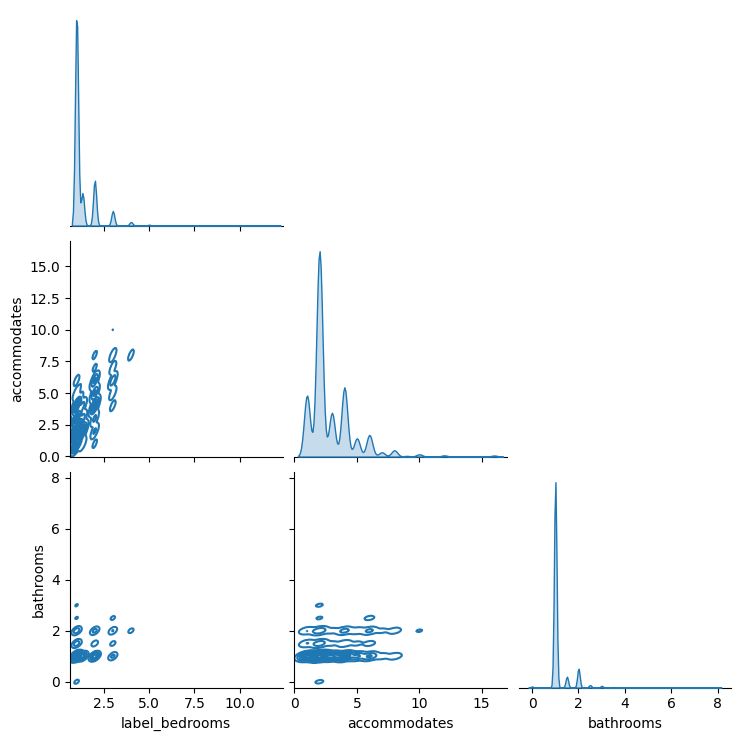

In [23]:
sns.pairplot(data = df_corrs, kind ='kde', corner = True)
plt.show()

There is indeed a correlation between the label and the two features, as when the number of bedrooms goes up, there is a slight tilt to the points cluster. In order to visualize this better, I have created scatterplots for both features compared to the label and the features compared with each other (all three are below my analysis). From what I can tell, there does not seem to be a clear strong correlation between the features and the label, however.

<AxesSubplot: >

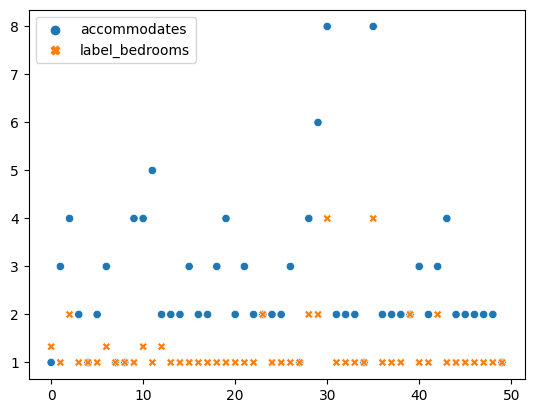

In [24]:
# Accommodates vs. Label_Bedrooms
df_corr1 = pd.DataFrame({'accommodates': df['accommodates'],'label_bedrooms': df['label_bedrooms']})
sns.scatterplot(data=df_corr1[:50])

<AxesSubplot: >

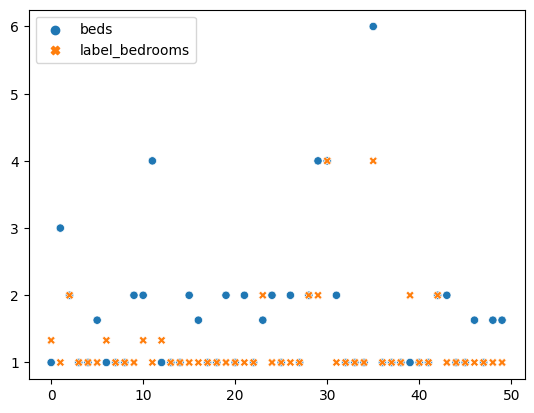

In [25]:
# Beds vs. Label_Bedrooms
df_corr2 = pd.DataFrame({'beds': df['beds'],'label_bedrooms': df['label_bedrooms']})
sns.scatterplot(data=df_corr2[:50])

<AxesSubplot: >

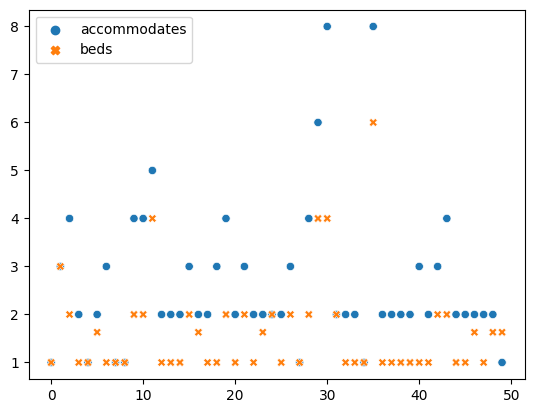

In [26]:
# Accommodates vs. Beds
df_corr3 = pd.DataFrame({'accommodates': df['accommodates'],'beds': df['beds']})
sns.scatterplot(data=df_corr3[:50])

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

* I do have a new feature list, which is: 'host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month',
       'n_host_verifications', 'host_response_rate_na',
       'host_acceptance_rate_na', and 'beds_na'.
* To prepare my data for modeling, not only will I delete/rename some features that I deem to be irrelevant, but I will winsorize the label to reduce outliers, analyze the correlations between the features and the label, one hot encode appropriate categorical features, and remove missing values, as I have already done in the above step.
* The models I am going to be using are Linear Regression, Decision Tree, Random Forest, Gradient Boosting Regressor, and Stacking Regressor. Since this is a regression problem, I believe most of these will be suitable for this problem.
* I am going to train each model and, based on their respective RMSE and R2 scores, I am going to deem which is the best. Then the best model will be selected for hyperparameter tuning so that it can be generalized to new data the best.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [27]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model. [DID THIS IN PART 3]
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

## -> Model Fitting, Training, and Selection

In [28]:
X = df.drop(columns=['label_bedrooms'])
y = df['label_bedrooms']

# Train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

lr_rmse = mean_squared_error(y_test, y_pred_lr, squared=False)
lr_r2 = r2_score(y_test, y_pred_lr)
print("[LR] RMSE:", lr_rmse)
print("[LR] R2:", lr_r2)

[LR] RMSE: 0.3957433929986493
[LR] R2: 0.6193709106520133


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [30]:
# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

dt_rmse = mean_squared_error(y_test, y_pred_dt, squared=False)
dt_r2 = r2_score(y_test, y_pred_dt)
print("[DT] RMSE:", dt_rmse)
print("[DT] R2:", dt_r2)

[DT] RMSE: 0.51265202440118
[DT] R2: 0.3612660750933131


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [31]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_rmse = mean_squared_error(y_test, y_pred_rf, squared=False)
rf_r2 = r2_score(y_test, y_pred_rf)
print("[RF] RMSE:", rf_rmse)
print("[RF] R2:", rf_r2)

[RF] RMSE: 0.3589613920704851
[RF] R2: 0.6868372403844559


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

gb_rmse = mean_squared_error(y_test, y_pred_gb, squared=False)
gb_r2 = r2_score(y_test, y_pred_gb)
print("[GB] RMSE:", gb_rmse)
print("[GB] R2:", gb_r2)

[GB] RMSE: 0.3641137911467157
[GB] R2: 0.6777826756095674


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
# Stacking Regressor
estimators = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('rf', RandomForestRegressor(random_state=42)),
    ('gb', GradientBoostingRegressor(random_state=42))
]

stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(random_state=42)
)

stacking_model.fit(X_train, y_train)
y_pred_stacking = stacking_model.predict(X_test)

stacking_rmse = mean_squared_error(y_test, y_pred_stacking, squared=False)
stacking_r2 = r2_score(y_test, y_pred_stacking)
print("[Stacking] RMSE:", stacking_rmse)
print("[Stacking] R2:", stacking_r2)

[Stacking] RMSE: 0.3792232078366961
[Stacking] R2: 0.6504861056128449


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


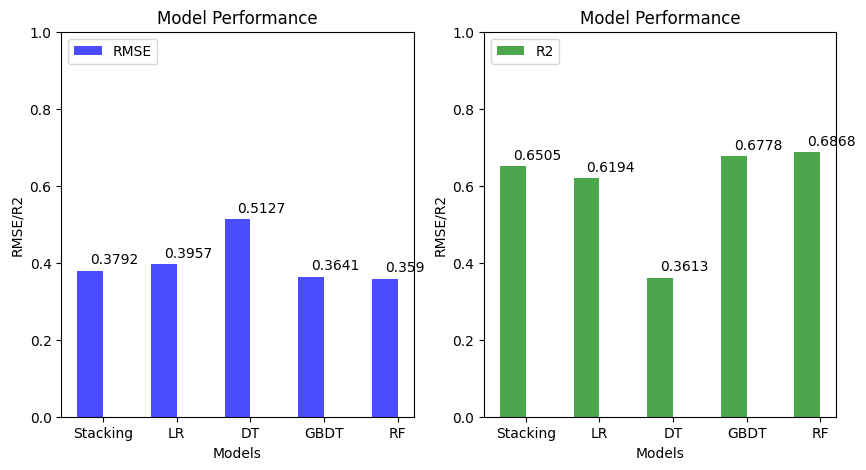

In [34]:
RMSE_Results = [stacking_rmse, lr_rmse, dt_rmse, gb_rmse, rf_rmse]
R2_Results = [stacking_r2, lr_r2, dt_r2, gb_r2, rf_r2]

rg = np.arange(5)
width = 0.35

# 1. Creates a bar plot with RMSE results.
plt.figure(figsize = (10, 5))
plt.subplot(1, 2, 1)
bars_rmse = plt.bar(rg, RMSE_Results, width, color = 'b', alpha = 0.7, label = 'RMSE')
# Iterates through the list to edit the bars' height.
for bar in bars_rmse:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), va = 'bottom')

labels = ['Stacking', 'LR', 'DT', 'GBDT', 'RF']
plt.xticks(rg + width/2, labels)

plt.xlabel('Models')
plt.ylabel('RMSE/R2')

plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc = 'upper left', ncol = 2)

# 2. Creates a bar plot with R2 results.
plt.subplot(1, 2, 2)
bars_r2 = plt.bar(rg, R2_Results, width, color = 'g', alpha = 0.7, label = 'R2')
# Iterates through the list to edit the bars' height.
for bar in bars_r2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), va = 'bottom')

labels = ['Stacking','LR', 'DT', 'GBDT', 'RF']
plt.xticks(rg + width/2, labels)

plt.xlabel("Models")
plt.ylabel("RMSE/R2")

plt.ylim([0,1])
plt.title('Model Performance')
plt.legend(loc = 'upper left', ncol = 2)
plt.show()

Based on these two bar graphs, it seems that the majority of the individual models (LR and DT) have higher RMSE scores. On the other hand, it seems that the majority of the ensemble models (GBDT, RF, and Stacking) have higher R2 scores. Therefore, given the fact that having a low RMSE and a high R2 is ideal when determining the best model, ensemble models are indeed performing better than the individual models. Overall, Random Forest seems to be the most effective model on this problem.

## -> Hyperparameter Tuning

Given the fact that it is quite difficult to see these results because of the large amount of fits, I'm going to reiterate the following for the Random Forest:
- Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
- Best RMSE found:  0.3549555835362214
- Test RMSE:  0.3492242482391

In [35]:
# Defines the parameter grid.
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initializes GridSearchCV.
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fits the model.
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; t

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   2.4s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.6s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.7s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.7s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   7.0s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   7.1s
[CV] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   7.1s
[CV] END bootstrap=True, max_depth=20, max_featu

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
209 fits failed with the following error:
Traceback (most recent call last):
  File "/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/base.py", line 666, in _validate_params

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [36]:
# Prints the best parameters and the best score.
print("Best parameters found: ", grid_search.best_params_)
print("Best RMSE found: ", (-grid_search.best_score_) ** 0.5)

# Evaluates the best model on the test set.
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Test RMSE: ", test_rmse)

Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best RMSE found:  0.3549555835362214
Test RMSE:  0.3492242482391


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
